# Skimlit Big

Using the techniques and the best model to train it on the 200k abstract dataset.

## Checking a GPU Access

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1660 Ti (UUID: GPU-7fba9be9-5762-f892-8d0f-63529aeb6747)


## Getting the Data

In [2]:
# Checking the data directory
!dir pubmed-rct

 Volume in drive C is OS
 Volume Serial Number is C4D7-ECF5

 Directory of C:\Users\rajat\OneDrive\Desktop\Tensorflow\MP-2 SkimLit\pubmed-rct

11-03-2023  22:59    <DIR>          .
30-04-2023  17:06    <DIR>          ..
11-03-2023  22:59    <DIR>          PubMed_200k_RCT
18-03-2023  22:45    <DIR>          PubMed_200k_RCT_numbers_replaced_with_at_sign
11-03-2023  22:59    <DIR>          PubMed_20k_RCT
11-03-2023  22:59    <DIR>          PubMed_20k_RCT_numbers_replaced_with_at_sign
11-03-2023  22:59             2,403 README.md
               1 File(s)          2,403 bytes
               6 Dir(s)  116,168,146,944 bytes free


In [3]:
# Creating the path
data_dir = "pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/"

In [4]:
# Checking the files present in the dataset
import os
os.listdir(data_dir)

['dev.txt', 'test.txt', 'train.txt', 'train.zip']

In [5]:
# Listing all filepaths:
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.zip']

## Getting the Data and Creating the Dataset

In [6]:
# Creating a function to read the text file and convert it into lines
def get_lines(filename):
    with open(filename, "r") as f:
        return f.readlines()

In [7]:
# Checking out the trainig files
train_lines = get_lines(filenames[2])
train_lines[:20]

['###24491034\n',
 'BACKGROUND\tThe emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n',
 'BACKGROUND\tThis paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .\n',
 'METHODS\tThis study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .\n',
 "METHODS\tThe intervention group will participate in the online group program ` Positive Outlook ' .\n",
 'METHODS\tThe program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .\n',
 'METHODS\tParticipants will access the program f

In [8]:
# Number of lines in training set
len(train_lines)

2593169

In [9]:
# Creating a function to convert this text to dictionary
def text_to_dict(filename):
    input_lines = get_lines(filename)
    abstract_lines = ""
    abstract_samples = []
    
    for line in input_lines:
        if line.startswith("###"):
            abstract_id = line
            abstract_lines = ""
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()
            
            for line_num, abstract_line in enumerate(abstract_line_split):
                line_data = {}
                target_text_split = abstract_line.split("\t")
                line_data["target"] = target_text_split[0]
                line_data["text"] = target_text_split[1]
                line_data["total_lines"] = len(abstract_line_split)
                line_data["line_number"] = line_num
                abstract_samples.append(line_data)
        else:
            abstract_lines += line 
        
    return abstract_samples

In [10]:
# Creating training samples
train_samples = text_to_dict(filenames[2])
train_samples[:10]

[{'target': 'BACKGROUND',
  'text': 'The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .',
  'total_lines': 11,
  'line_number': 0},
 {'target': 'BACKGROUND',
  'text': 'This paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .',
  'total_lines': 11,
  'line_number': 1},
 {'target': 'METHODS',
  'text': 'This study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .',
  'total_lines': 11,
  'line_number': 2},
 {'target': 'METHODS',
  'text': "The intervention group will participate in the online group program ` Positive Outlook ' .",
  'total_lines': 11,
  'line_number': 3},
 {'target': 'METHODS',
  '

In [11]:
# Creating validation and test samples
val_samples = text_to_dict(filenames[0])
test_samples = text_to_dict(filenames[1])
print(len(train_samples), len(val_samples), len(test_samples))

2211861 28932 29493


In [12]:
# Creating a data frame
import pandas as pd
def create_df(samples):
    return pd.DataFrame(samples)

train_df = create_df(train_samples)
val_df = create_df(val_samples)
test_df = create_df(test_samples)

In [13]:
# Checking the training dataframes
train_df.head(10)

,target,text,total_lines,line_number
0,BACKGROUND,The emergence of HIV as a chronic condition me...,11,0
1,BACKGROUND,This paper describes the design and evaluation...,11,1
2,METHODS,This study is designed as a randomised control...,11,2
3,METHODS,The intervention group will participate in the...,11,3
4,METHODS,The program is based on self-efficacy theory a...,11,4
5,METHODS,Participants will access the program for a min...,11,5
6,METHODS,Primary outcomes are domain specific self-effi...,11,6
7,METHODS,"Secondary outcomes include : depression , anxi...",11,7
8,METHODS,"Data collection will take place at baseline , ...",11,8
9,CONCLUSIONS,Results of the Positive Outlook study will pro...,11,9


In [14]:
test_df.head(10)

,target,text,total_lines,line_number
0,BACKGROUND,Many pathogenic processes and diseases are the...,11,0
1,BACKGROUND,It was recently demonstrated that supraphysiol...,11,1
2,BACKGROUND,"In the present study , we examined the associa...",11,2
3,BACKGROUND,"In addition , we compared plasma levels of MAp...",11,3
4,METHODS,A total of @ MI patients and @ control persons...,11,4
5,METHODS,Plasma samples were obtained and analysed with...,11,5
6,METHODS,The myocardial outcomes ( salvage index and fi...,11,6
7,RESULTS,MI patients had @ % higher plasma levels of MA...,11,7
8,RESULTS,"However , neither salvage index ( Spearman rho...",11,8
9,RESULTS,"Likewise , MASP-@ and MASP-@ were elevated in ...",11,9


In [15]:
val_df.head(10)

,target,text,total_lines,line_number
0,BACKGROUND,Adrenergic activation is thought to be an impo...,9,0
1,RESULTS,Systemic venous norepinephrine was measured at...,9,1
2,RESULTS,Baseline norepinephrine level was associated w...,9,2
3,RESULTS,"On multivariate analysis , baseline norepineph...",9,3
4,RESULTS,"In contrast , the relation of the change in no...",9,4
5,RESULTS,In the placebo-treated group but not in the bu...,9,5
6,RESULTS,In the bucindolol-treated group but not in the...,9,6
7,RESULTS,A likelihood-based method indicated that @ % o...,9,7
8,CONCLUSIONS,"In BEST , a subset of patients treated with bu...",9,8
9,OBJECTIVE,The study evaluated the effectiveness of a thr...,12,0


RESULTS        766271
METHODS        722586
CONCLUSIONS    339714
BACKGROUND     196689
OBJECTIVE      186601
Name: target, dtype: int64


<AxesSubplot:>

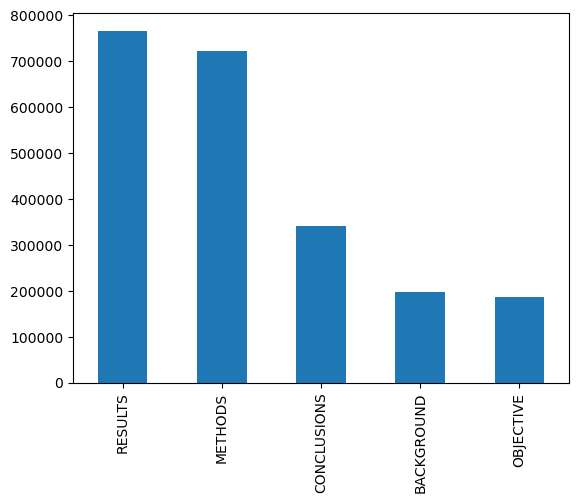

In [16]:
# Checking the number of target values of each type
print(train_df.target.value_counts())
train_df.target.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

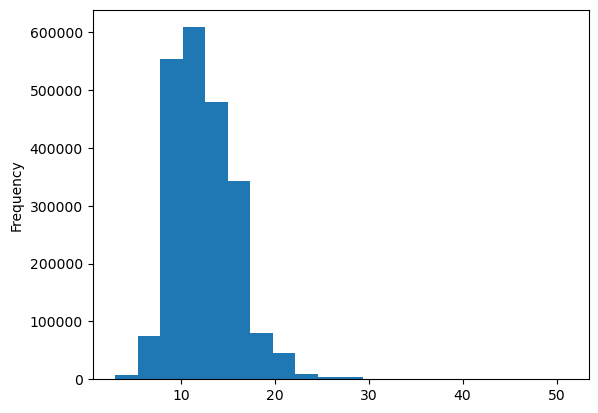

In [17]:
# Checkin the ditribution of total lines 
train_df.total_lines.plot.hist(bins = 20)

In [18]:
# Getting a list of sentences 
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()
print(len(train_sentences), len(val_sentences), len(test_sentences))

2211861 28932 29493


## Preprocessing the data

### 1. Encoding the Data

In [19]:
# Creating a function to onehot encode data
from sklearn.preprocessing import OneHotEncoder
def one_hot(df_attr):
    one_hot_encoder = OneHotEncoder(sparse = False)
    return one_hot_encoder.fit_transform(df_attr.to_numpy().reshape(-1, 1))

In [20]:
# Converting target values into onehot vectors 
train_labels_one_hot = one_hot(train_df["target"])
val_labels_one_hot = one_hot(val_df["target"])
test_labels_one_hot = one_hot(test_df["target"])
train_labels_one_hot, val_labels_one_hot, test_labels_one_hot

(array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]))

In [21]:
# Creating a Label Encoding the Target Data
from sklearn.preprocessing import LabelEncoder
def label_encode(df_attr):
    le = LabelEncoder()
    return le.fit_transform(df_attr.to_numpy()), le.classes_, len(le.classes_) 

In [22]:
# Creating label encodings of the target
train_labels_encoded, class_names, num_classes  = label_encode(train_df["target"])
val_labels_encoded, _, _ = label_encode(val_df["target"])
test_labels_encoded, _, _ = label_encode(test_df["target"])
train_labels_encoded, val_labels_encoded, test_labels_encoded

(array([0, 0, 2, ..., 4, 4, 4]),
 array([0, 4, 4, ..., 4, 1, 1]),
 array([0, 0, 0, ..., 4, 1, 1]))

In [23]:
# Getting the number of classes and class names
class_names, num_classes

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object),
 5)

### 2. Word Level Tokenisation

In [24]:
# Average length of each sentence
import numpy as np
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_length = np.mean(sent_len)
avg_sent_length

26.229355280462922

(array([6.656900e+05, 1.064939e+06, 3.491070e+05, 9.095700e+04,
        2.651300e+04, 8.980000e+03, 3.125000e+03, 1.374000e+03,
        5.800000e+02, 2.770000e+02, 1.350000e+02, 7.100000e+01,
        5.200000e+01, 2.400000e+01, 1.900000e+01, 6.000000e+00,
        4.000000e+00, 5.000000e+00, 1.000000e+00, 2.000000e+00]),
 array([  1.  ,  17.85,  34.7 ,  51.55,  68.4 ,  85.25, 102.1 , 118.95,
        135.8 , 152.65, 169.5 , 186.35, 203.2 , 220.05, 236.9 , 253.75,
        270.6 , 287.45, 304.3 , 321.15, 338.  ]),
 <BarContainer object of 20 artists>)

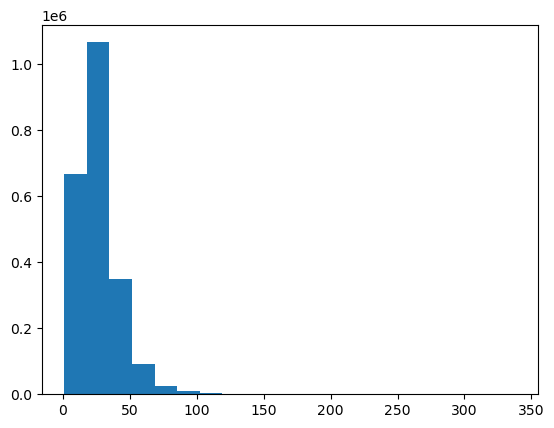

In [25]:
import matplotlib.pyplot as plt
plt.hist(sent_len, bins = 20)

In [25]:
# Length that covers 98% of sentence length
output_seq_len = int(np.percentile(sent_len, 98))
output_seq_len

67

In [26]:
# Maximum sequence length in training set
max(sent_len)

338

In [27]:
# Vocabulary size (taken from table 2 https://arxiv.org/abs/1710.06071)
max_token = 331000

In [28]:
# Creating a text vectorizer
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens = max_token,
                                    output_sequence_length = output_seq_len)

In [29]:
# Adapting the Text Vectorizer to training sentences
text_vectorizer.adapt(train_sentences, batch_size=128)

In [30]:
import pickle
pickle.dump({'config': text_vectorizer.get_config(),
             'weights': text_vectorizer.get_weights()}
            , open("tv_layer.pkl", "wb"))

In [32]:
import tensorflow as tf
from_disk = pickle.load(open("tv_layer.pkl", "rb"))
text_vectorizer = TextVectorization.from_config(from_disk['config'])
# You have to call `adapt` with some dummy data (BUG in Keras)
text_vectorizer.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))
text_vectorizer.set_weights(from_disk['weights'])

In [33]:
# testing text vectorizer on random sentences
import random
target_sent = random.choice(train_sentences)
print(f"Text: \n{target_sent}")
print(f"\nLength of text: {len(target_sent.split())}")
print(f"\nVectorizer text: {text_vectorizer([target_sent])}")

Text: 
The relationship between changes in stance-phase knee flexion and changes in pain , disability , and onset timing of individual vasti activity was also examined .

Length of text: 26

Vectorizer text: [[    2   686    32   136     5 67383   579  2563     4   136     5    61
    763     4   622  2461     3   634 47876   198    10   127   436     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [34]:
# Exploring our training vocab
rct_200k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vorct_200k_text_vocab: {len(rct_200k_text_vocab)}")
print(f"Most common words in vocab: {rct_200k_text_vocab[:20]}")
print(f"Least common words in vocab: {rct_200k_text_vocab[-5:]}")

Number of words in vorct_200k_text_vocab: 247961
Most common words in vocab: ['', '[UNK]', 'the', 'of', 'and', 'in', 'to', 'with', 'a', 'were', 'was', 'patients', 'for', 'group', 'p', 'or', 'at', 'treatment', 'study', 'on']
Least common words in vocab: ['aaae', 'aaacp', 'aaabbb', 'aaaanalog', 'aaaa']


In [35]:
# Checking the configuration of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 331000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 67,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

### 3. Token Embedding Layer (Pretrained)

In [36]:
# Downloading a pretrained USE (unicersal sentence encoder) embedding
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable = False,
                                        name = "Universal_Sentence_Encoder")

In [37]:
use_embedded_sent = tf_hub_embedding_layer(["This RCT examined the efficacy of a manualized social intervention for children with HFASDs"])
use_embedded_sent

UnknownError: Exception encountered when calling layer "Universal_Sentence_Encoder" "                 f"(type KerasLayer).

Graph execution error:

JIT compilation failed.
	 [[{{node EncoderDNN/EmbeddingLookup/EmbeddingLookupUnique/embedding_lookup/mod}}]] [Op:__inference_restored_function_body_39498]

Call arguments received by layer "Universal_Sentence_Encoder" "                 f"(type KerasLayer):
  • inputs=["'This RCT examined the efficacy of a manualized social intervention for children with HFASDs'"]
  • training=None

In [36]:
# Test out the pretrained embedding on random sentence
random_train_sentence = random.choice(train_sentences)
use_embedded_sent = tf_hub_embedding_layer([random_train_sentence]) 
print(f"Random Sentence:\n{random_train_sentence}")
print(f"Sentence after embedding: \n{use_embedded_sent[0][:30]}")
print(f"Length of sentence embedding: {len(use_embedded_sent[0])}")

UnknownError: Exception encountered when calling layer "Universal_Sentence_Encoder" "                 f"(type KerasLayer).

Graph execution error:

JIT compilation failed.
	 [[{{node EncoderDNN/EmbeddingLookup/EmbeddingLookupUnique/embedding_lookup/mod}}]] [Op:__inference_restored_function_body_39322]

Call arguments received by layer "Universal_Sentence_Encoder" "                 f"(type KerasLayer):
  • inputs=["'A mean of @ DRPs/patient ( @ % CI , @-@ @ ) was identified based on the PAIR criteria compared with @ DRPs/patient ( @ % CI , @-@ @ ) based on clinical judgment of nephrology pharmacists .'"]
  • training=None

### 4. Character Level Tokenization

In [45]:
# Creating a function too split sentences into charactrs
def split_chars(text):
    return " ".join(list(text))

# Text splitting non-character-level sequence into characters
split_chars(random_train_sentence)

In [59]:
# Splitting sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
train_chars[:3]

['T h e   e m e r g e n c e   o f   H I V   a s   a   c h r o n i c   c o n d i t i o n   m e a n s   t h a t   p e o p l e   l i v i n g   w i t h   H I V   a r e   r e q u i r e d   t o   t a k e   m o r e   r e s p o n s i b i l i t y   f o r   t h e   s e l f - m a n a g e m e n t   o f   t h e i r   c o n d i t i o n   ,   i n c l u d i n g   m a k i n g   p h y s i c a l   ,   e m o t i o n a l   a n d   s o c i a l   a d j u s t m e n t s   .',
 'T h i s   p a p e r   d e s c r i b e s   t h e   d e s i g n   a n d   e v a l u a t i o n   o f   P o s i t i v e   O u t l o o k   ,   a n   o n l i n e   p r o g r a m   a i m i n g   t o   e n h a n c e   t h e   s e l f - m a n a g e m e n t   s k i l l s   o f   g a y   m e n   l i v i n g   w i t h   H I V   .',
 'T h i s   s t u d y   i s   d e s i g n e d   a s   a   r a n d o m i s e d   c o n t r o l l e d   t r i a l   i n   w h i c h   m e n   l i v i n g   w i t h   H I V   i n   A u s t r a l i a   w i l l   b e   a s s 

In [60]:
# Average Character length
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

147.82646377869133

(array([1.73008e+05, 7.09771e+05, 7.07576e+05, 3.79589e+05, 1.53041e+05,
        5.52560e+04, 1.99370e+04, 7.95500e+03, 3.07000e+03, 1.35700e+03,
        6.31000e+02, 3.15000e+02, 1.49000e+02, 8.50000e+01, 5.60000e+01,
        3.10000e+01, 1.20000e+01, 6.00000e+00, 8.00000e+00, 4.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 6.01333333e+01, 1.19266667e+02, 1.78400000e+02,
        2.37533333e+02, 2.96666667e+02, 3.55800000e+02, 4.14933333e+02,
        4.74066667e+02, 5.33200000e+02, 5.92333333e+02, 6.51466667e+02,
        7.10600000e+02, 7.69733333e+02, 8.28866667e+02, 8.88000000e+02,
        9.47133333e+02, 1.00626667e+03, 1.06540000e+03, 1.12453333e+03,
        1.18366667e+03, 1.24280000e+03, 1.30193333e+03, 1.36106667e+03,
        1.42020000e+03, 1.47933333e+03, 1.53846667e+03, 1.59760000e+03,
        1.65673333e+03, 1.71586667e+03, 1.77500000e+03])

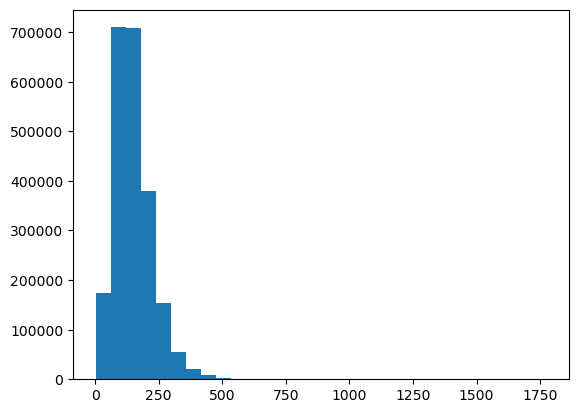

In [62]:
# Distributuib if sequences ar character level
plt.hist(char_lens, bins = 30)

In [63]:
# Length that covers 98% of data
output_seq_char_len = int(np.percentile(char_lens, 98))
output_seq_char_len

338

In [68]:
# Getting all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet, len(alphabet)

('abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', 68)

In [69]:
# Creating char-level token vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2 # 2 for space and OOV tokens
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    name = "Char_Vectorizer")

In [70]:
# Adapt character vectorizer to training character
char_vectorizer.adapt(train_chars, batch_size = 128)

In [72]:
# Checking the character voacab
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in vocab: {len(char_vocab)}")
print(f"Most common characters in vocab: {char_vocab[:10]}")
print(f"Least commmon characters in vocab: {char_vocab[-5:]}")

Number of different characters in vocab: 28
Most common characters in vocab: ['', '[UNK]', 'e', 't', 'a', 'i', 'n', 'o', 'r', 's']
Least commmon characters in vocab: ['k', 'x', 'z', 'q', 'j']


In [74]:
# Testing our character vectorizer
random_train_char = random.choice(train_chars)
vectorized_chars = char_vectorizer([random_train_char])
print(f"Charified Text: \n{random_train_char}")
print(f"\nVectorized Chars: \n{vectorized_chars}")
print(f"\nLength of Vectorized Chars: \n{len(vectorized_chars[0])}")

Charified Text: 
E i g h t y - f o u r   p a t i e n t s   w i t h   s k u l l   b a s e   t u m o r s   i n v o l v e d   i n   t h i s   r e s e a r c h   w e r e   r a n d o m i z e d   i n t o   @   g r o u p s   (   t e s t   g r o u p   a n d   c o n t r o l   g r o u p   )   ,   e a c h   w i t h   @   p a t i e n t s   .

Vectorized Chars: 
[[ 2  5 18 13  3 19 17  7 16  8 14  4  3  5  2  6  3  9 20  5  3 13  9 23
  16 11 11 22  4  9  2  3 16 15  7  8  9  5  6 21  7 11 21  2 10  5  6  3
  13  5  9  8  2  9  2  4  8 12 13 20  2  8  2  8  4  6 10  7 15  5 25  2
  10  5  6  3  7 18  8  7 16 14  9  3  2  9  3 18  8  7 16 14  4  6 10 12
   7  6  3  8  7 11 18  8  7 16 14  2  4 12 13 20  5  3 13 14  4  3  5  2
   6  3  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

### 5. Creating Character Level Embedding

In [76]:
# Create char embedding
from tensorflow.keras.layers import Embedding
char_embedding = Embedding(input_dim = len(char_vocab),
                           output_dim = 25,
                           mask_zero = True,
                           name = "Char_Embedd")

In [77]:
# Testing our character Embedding
char_embed_sent = char_embedding(char_vectorizer([random_train_char])) 
print(f"Charified Text: \n{random_train_char}")
print(f"Embedded Chars: \n{char_embed_sent}")
print(f"Character Embedding Shape: {char_embed_sent.shape}")

Charified Text: 
E i g h t y - f o u r   p a t i e n t s   w i t h   s k u l l   b a s e   t u m o r s   i n v o l v e d   i n   t h i s   r e s e a r c h   w e r e   r a n d o m i z e d   i n t o   @   g r o u p s   (   t e s t   g r o u p   a n d   c o n t r o l   g r o u p   )   ,   e a c h   w i t h   @   p a t i e n t s   .
Embedded Chars: 
[[[-0.00062526  0.02550408 -0.00743321 ... -0.02448945 -0.01450983
    0.01488822]
  [ 0.03120898  0.04514461  0.04033085 ...  0.034501    0.02778282
   -0.00508169]
  [-0.03336968 -0.04185022 -0.0427778  ... -0.04246883  0.04828042
   -0.03702971]
  ...
  [ 0.02621192 -0.03961357 -0.00202983 ...  0.02466286  0.04530848
    0.02905757]
  [ 0.02621192 -0.03961357 -0.00202983 ...  0.02466286  0.04530848
    0.02905757]
  [ 0.02621192 -0.03961357 -0.00202983 ...  0.02466286  0.04530848
    0.02905757]]]
Character Embedding Shape: (1, 338, 25)


### 6. Positional Embeddings

In [80]:
# Checking different number of lines
train_df["line_number"].value_counts()

0     190654
1     190654
2     190654
3     190644
4     190357
5     189080
6     185551
7     177967
8     164187
9     143835
10    117871
11     90168
12     64864
13     44350
14     29186
15     18785
16     11803
17      7392
18      4688
19      3030
20      1925
21      1268
22       814
23       564
24       398
25       288
26       214
27       159
28       118
29        88
30        64
31        55
32        42
33        34
34        21
35        17
36        12
37         9
40         6
38         6
39         6
41         5
42         5
43         5
44         4
45         4
46         3
47         2
48         2
49         2
50         1
Name: line_number, dtype: int64

<AxesSubplot:ylabel='Frequency'>

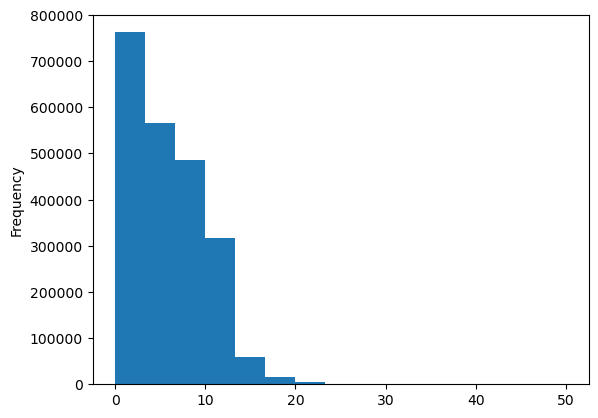

In [82]:
# Checking the distribution
train_df.line_number.plot.hist(bins = 15)

In [95]:
# Creating one-hot-encoded tensors of line_numbers
import tensorflow as tf
train_line_num_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth = 18) 
val_line_num_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 18) 
test_line_num_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth = 18) 
train_line_num_one_hot[:10], train_line_num_one_hot.shape

(<tf.Tensor: shape=(10, 18), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.]], dtype=float32)>,
 TensorShape([2211861

In [85]:
# Checking the Distribution number of total line
train_df["total_lines"].value_counts()

11    304733
12    303648
13    266682
10    259640
14    212296
9     183168
15    156015
16    111712
8     110240
17     74987
7      53088
18     48672
19     31502
20     22100
6      21174
21     13797
22      9988
5       6385
23      5750
24      3984
25      2750
26      1924
27      1485
28      1148
4       1148
29       870
30       720
34       442
32       416
31       279
33       264
36       180
35       140
38       114
37       111
51        51
50        50
47        47
46        46
44        44
41        41
3         30
Name: total_lines, dtype: int64

<AxesSubplot:ylabel='Frequency'>

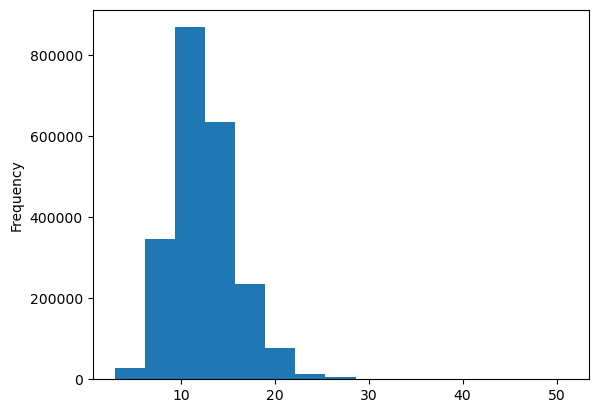

In [86]:
# Checking the Distribution
train_df.total_lines.plot.hist(bins = 15)

In [87]:
# Checking coverage of 98% of data
np.percentile(train_df.total_lines, 98)

21.0

In [88]:
# Creating one-hot encoded tensors of total_lines
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=21)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=21)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=21)

train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([2211861, 21]),
 <tf.Tensor: shape=(10, 21), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.

## Preparing the Datasets

In [91]:
def create_dataset(x, y, batch_size=32):
    """
    Takes in dependent and independent data items or numpy arrays or tensors and
    creates a tf.data.Dataset object with prefectching 
    """
    data = tf.data.Dataset.from_tensor_slices(x)
    labels = tf.data.Dataset.from_tensor_slices(y)
    dataset = tf.data.Dataset.zip((data, labels))
    
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Creating training, testing and validation datasets
# Training Dataset
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_num_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_num_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(128).prefetch(tf.data.AUTOTUNE)


In [92]:
train_dataset = create_dataset(x = (train_line_num_one_hot,
                                    train_total_lines_one_hot,
                                    train_sentences,
                                    train_chars),
                               y = train_labels_one_hot,
                               batch_size = 128)

In [93]:
train_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), TensorSpec(shape=(None, 21), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [96]:
val_dataset = create_dataset(x = (val_line_num_one_hot,
                                  val_total_lines_one_hot,
                                  val_sentences,
                                  val_chars),
                             y = val_labels_one_hot,
                             batch_size=128)

test_dataset = create_dataset(x = (test_line_num_one_hot,
                                    test_total_lines_one_hot,
                                    test_sentences,
                                    test_chars),
                              y = test_labels_one_hot,
                              batch_size=128)

val_dataset, test_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), TensorSpec(shape=(None, 21), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), TensorSpec(shape=(None, 21), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

## Creating the Model (Tribrid Embedding Model)

In [98]:
from tensorflow.keras import layers

# 1. Creating a token_input model
token_ip = layers.Input(shape=[], dtype="string", name="token_input")
token_embeddings = tf_hub_embedding_layer(token_ip)
token_op = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_ip,
                             outputs = token_op)

# 2. Creating a character_input model
char_ip = layers.Input(shape=(1,), dtype="string", name="char_input")
char_vectors = char_vectorizer(char_ip)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_ip,
                            outputs=char_bi_lstm)

# 3. Creating a Line Number Input Model
line_num_ip = layers.Input(shape=(18,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_num_ip)
line_num_model = tf.keras.Model(inputs = line_num_ip,
                                outputs = x)

# 4. Creating a total line input model
total_lines_ip = layers.Input(shape=(21,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_ip)
total_lines_model = tf.keras.Model(inputs = total_lines_ip,
                                   outputs = y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.4)(z)

# 6. Combine positional embeddings with combined token-char embeddings into a tribrid embedding
z = layers.Concatenate(name = "token_char_positional_embedding")([line_num_model.output,
                                                                  total_lines_model.output,
                                                                  z])
#z = layers.Dropout(0.2)

# 7. Create an output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put the model together
model_5 = tf.keras.Model(inputs=[line_num_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

In [99]:
# Checking the model summary
model_5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 Char_Vectorizer (TextVectoriza  (None, 338)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 Universal_Sentence_Encoder (Ke  (None, 512)         256797824   ['token_input[0][0]']      

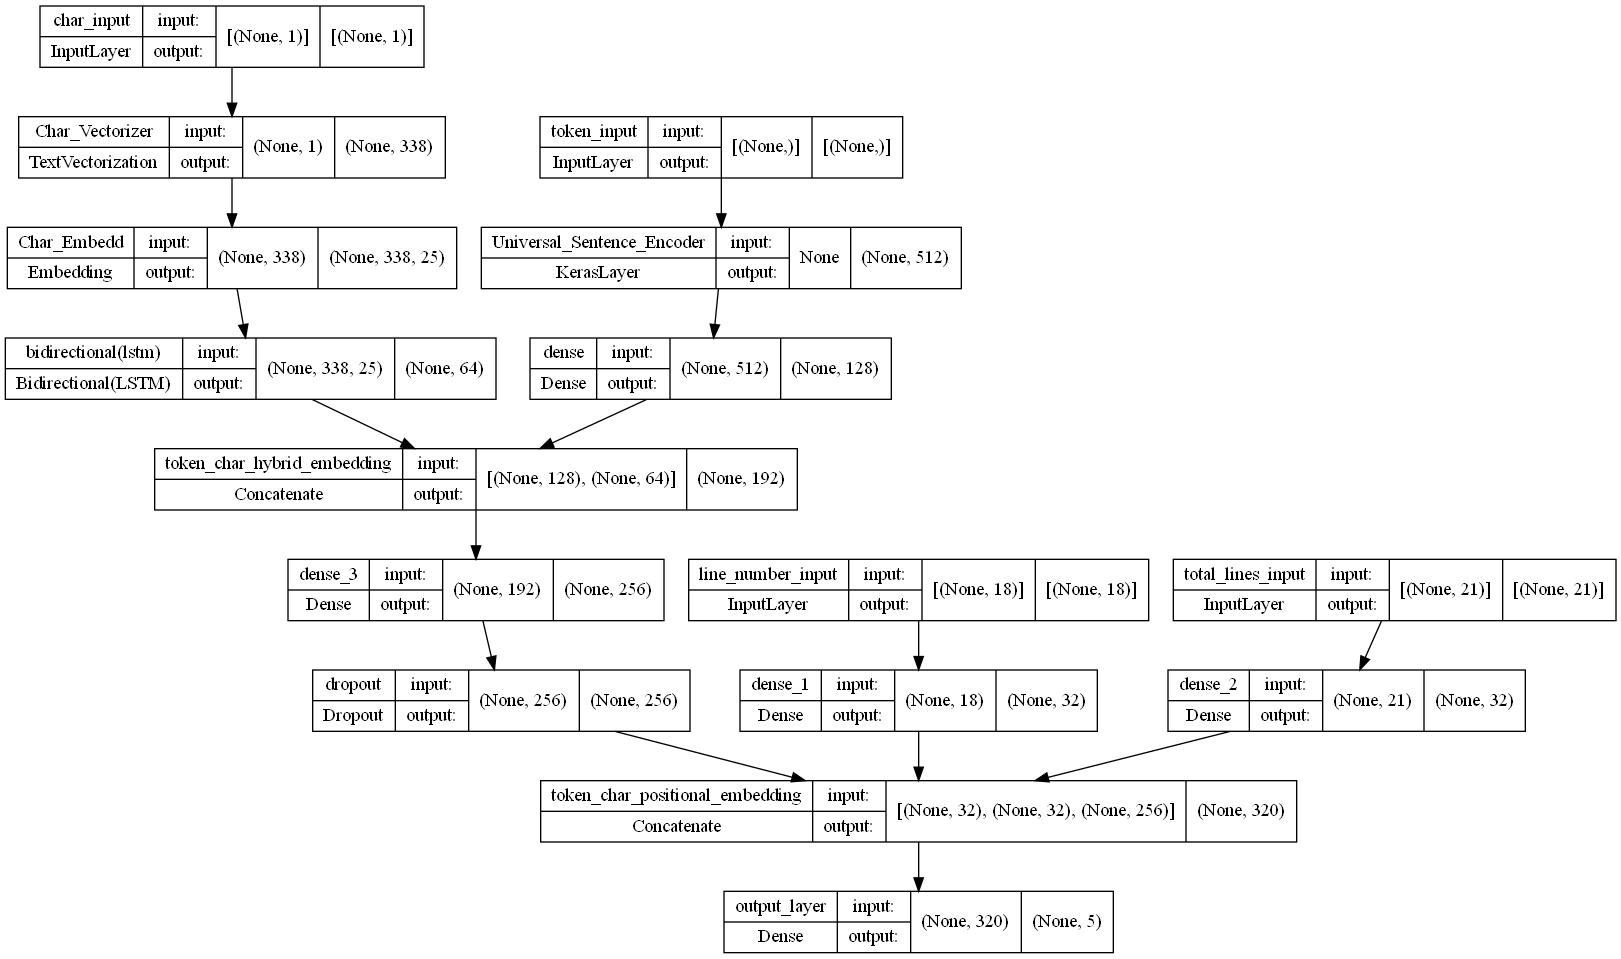

In [102]:
# Plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model_5, show_shapes = True)

In [114]:
# Creating an Early Stopping callbacks
EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta = 0.01,
                                             patience=1)

In [107]:
# Compiling the model
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.25),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

In [108]:
# Fitting the model
history = model_5.fit(train_dataset,
                      steps_per_epoch=int(0.05 * len(train_dataset)),
                      epochs = 50,
                      validation_data=val_dataset,
                      validation_steps=int(0.05 * len(val_dataset)),
                      callbacks=[EarlyStop])

Epoch 1/50
864/864 [==============================] - 206s 225ms/step - loss: 1.2608 - accuracy: 0.6363 - val_loss: 1.1318 - val_accuracy: 0.7344
Epoch 2/50
864/864 [==============================] - 187s 217ms/step - loss: 1.1098 - accuracy: 0.7668 - val_loss: 1.0759 - val_accuracy: 0.7947
Epoch 3/50
864/864 [==============================] - 218s 253ms/step - loss: 1.0675 - accuracy: 0.7989 - val_loss: 1.0492 - val_accuracy: 0.8146
Epoch 4/50
864/864 [==============================] - 163s 189ms/step - loss: 1.0459 - accuracy: 0.8120 - val_loss: 1.0386 - val_accuracy: 0.8153
Epoch 5/50
864/864 [==============================] - 199s 230ms/step - loss: 1.0366 - accuracy: 0.8197 - val_loss: 1.0296 - val_accuracy: 0.8217
Epoch 6/50
864/864 [==============================] - 187s 216ms/step - loss: 1.0280 - accuracy: 0.8269 - val_loss: 1.0243 - val_accuracy: 0.8303
Epoch 7/50
864/864 [==============================] - 172s 199ms/step - loss: 1.0212 - accuracy: 0.8318 - val_loss: 1.0195 -

KeyboardInterrupt: 

NameError: name 'history' is not defined

## Evaluating on Test and Complete Validation Dataset

In [115]:
model_5.evaluate(test_dataset)

231/231 [==============================] - 16s 68ms/step - loss: 0.9978 - accuracy: 0.8505


[0.9978446960449219, 0.8504729866981506]

In [116]:
model_5.evaluate(val_dataset)

227/227 [==============================] - 15s 68ms/step - loss: 0.9930 - accuracy: 0.8524


[0.9929583668708801, 0.8523780107498169]

## Saving the Model

In [117]:
model_5.save("Skimlit_Big_Tribrid")

INFO:tensorflow:Assets written to: Skimlit_Big_Tribrid\assets


INFO:tensorflow:Assets written to: Skimlit_Big_Tribrid\assets


## Loading the Model

In [49]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("Skimlit_Big_Tribrid")

In [120]:
# Evaluating
loaded_model.evaluate(test_dataset)

231/231 [==============================] - 24s 89ms/step - loss: 0.9978 - accuracy: 0.8505


[0.9978446960449219, 0.8504729866981506]

In [122]:
# Making predictions and getting the prediction probabilities
loaded_model_pred_probs = loaded_model.predict(val_dataset)
loaded_model_pred_probs[:10]

array([[0.42976603, 0.08243331, 0.04898008, 0.2841905 , 0.15463004],
       [0.17626809, 0.059529  , 0.4603506 , 0.19567338, 0.10817891],
       [0.17678967, 0.05599992, 0.19652526, 0.13574743, 0.43493772],
       [0.08664176, 0.05430475, 0.45425838, 0.07712474, 0.32767034],
       [0.10734669, 0.20022653, 0.16907315, 0.09501008, 0.42834353],
       [0.05521187, 0.07608863, 0.05724574, 0.04867561, 0.7627781 ],
       [0.04348138, 0.08000614, 0.03935573, 0.03855627, 0.7986005 ],
       [0.0507997 , 0.17326854, 0.04406545, 0.04204562, 0.6898207 ],
       [0.04643226, 0.4807227 , 0.04605399, 0.04662652, 0.38016444],
       [0.25453454, 0.02517579, 0.09097354, 0.57955337, 0.04976276]],
      dtype=float32)

In [123]:
# Getting the prediction classes
loaded_preds = tf.argmax(loaded_model_pred_probs, axis = 1)
loaded_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 2, 4, 2, 4, 4, 4, 4, 1, 3], dtype=int64)>

In [125]:
# Calculating the results
from helper import calculate_results
loaded_model_results = calculate_results(y_true = val_labels_encoded,
                                          y_pred = loaded_preds)
loaded_model_results

{'accuracy': 85.23779897691138,
 'precision': 0.8510103620152915,
 'recall': 0.8523779897691138,
 'f1': 0.8511338892242143}

In [129]:
# Getting actual pred class names
test_pred_classes = class_names[loaded_preds]
test_pred_classes

array(['BACKGROUND', 'METHODS', 'RESULTS', ..., 'RESULTS', 'RESULTS',
       'CONCLUSIONS'], dtype=object)

In [38]:
## Making an Example Prediction
import json
with open("skimlit_example_abstracts.json", "r") as f:
    example_abstract = json.load(f)

example_abstract

[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [39]:
import pandas as pd
abstracts = pd.DataFrame(example_abstract)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [40]:
abstract_lines = example_abstract[2]["abstract"].split(".")
del abstract_lines[len(abstract_lines) - 1]
abstract_lines

['Mental illness, including depression, anxiety and bipolar disorder, accounts for a significant proportion of global disability and poses a substantial social, economic and heath burden',
 ' Treatment is presently dominated by pharmacotherapy, such as antidepressants, and psychotherapy, such as cognitive behavioural therapy; however, such treatments avert less than half of the disease burden, suggesting that additional strategies are needed to prevent and treat mental disorders',
 ' There are now consistent mechanistic, observational and interventional data to suggest diet quality may be a modifiable risk factor for mental illness',
 ' This review provides an overview of the nutritional psychiatry field',
 ' It includes a discussion of the neurobiological mechanisms likely modulated by diet, the use of dietary and nutraceutical interventions in mental disorders, and recommendations for further research',
 ' Potential biological pathways related to mental disorders include inflammation

In [41]:
# making the input suitable for model
total_lines = len(abstract_lines)

sample_lines = []
for i, line in enumerate(abstract_lines):
    sample_dict = {}
    sample_dict["text"] = str(line)
    sample_dict["line_number"] = i
    sample_dict["total_lines"] = total_lines - 1
    sample_lines.append(sample_dict)

sample_lines

[{'text': 'Mental illness, including depression, anxiety and bipolar disorder, accounts for a significant proportion of global disability and poses a substantial social, economic and heath burden',
  'line_number': 0,
  'total_lines': 9},
 {'text': ' Treatment is presently dominated by pharmacotherapy, such as antidepressants, and psychotherapy, such as cognitive behavioural therapy; however, such treatments avert less than half of the disease burden, suggesting that additional strategies are needed to prevent and treat mental disorders',
  'line_number': 1,
  'total_lines': 9},
 {'text': ' There are now consistent mechanistic, observational and interventional data to suggest diet quality may be a modifiable risk factor for mental illness',
  'line_number': 2,
  'total_lines': 9},
 {'text': ' This review provides an overview of the nutritional psychiatry field',
  'line_number': 3,
  'total_lines': 9},
 {'text': ' It includes a discussion of the neurobiological mechanisms likely modula

In [42]:
import tensorflow as tf
test_abstract_line_nums = [line["line_number"] for line in sample_lines]
test_abstract_line_nums_one_hot = tf.squeeze(tf.one_hot(test_abstract_line_nums, depth = 18))
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
test_abstract_total_lines_one_hot = tf.squeeze(tf.one_hot(test_abstract_total_lines, depth = 21))
test_abstract_line_nums_one_hot, test_abstract_total_lines_one_hot

(<tf.Tensor: shape=(10, 18), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(1

In [46]:
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['M e n t a l   i l l n e s s ,   i n c l u d i n g   d e p r e s s i o n ,   a n x i e t y   a n d   b i p o l a r   d i s o r d e r ,   a c c o u n t s   f o r   a   s i g n i f i c a n t   p r o p o r t i o n   o f   g l o b a l   d i s a b i l i t y   a n d   p o s e s   a   s u b s t a n t i a l   s o c i a l ,   e c o n o m i c   a n d   h e a t h   b u r d e n',
 '  T r e a t m e n t   i s   p r e s e n t l y   d o m i n a t e d   b y   p h a r m a c o t h e r a p y ,   s u c h   a s   a n t i d e p r e s s a n t s ,   a n d   p s y c h o t h e r a p y ,   s u c h   a s   c o g n i t i v e   b e h a v i o u r a l   t h e r a p y ;   h o w e v e r ,   s u c h   t r e a t m e n t s   a v e r t   l e s s   t h a n   h a l f   o f   t h e   d i s e a s e   b u r d e n ,   s u g g e s t i n g   t h a t   a d d i t i o n a l   s t r a t e g i e s   a r e   n e e d e d   t o   p r e v e n t   a n d   t r e a t   m e n t a l   d i s o r d e r s',
 '  T h e r e   a r e   n o w   c o n s 

In [47]:
# Checking final shapes
print(f"Line Num Shape: {test_abstract_line_nums_one_hot.shape}")
print(f"Total Lines Shape: {test_abstract_total_lines_one_hot.shape}")
print(f"Abstract Lines Shape: {tf.constant(abstract_lines).shape}")
print(f"Abstract Chars Shape: {tf.constant(abstract_chars).shape}")

Line Num Shape: (10, 18)
Total Lines Shape: (10, 21)
Abstract Lines Shape: (10,)
Abstract Chars Shape: (10,)


In [50]:
#Making the predictions
test_abstarct_pred_probs = loaded_model.predict(x = (test_abstract_line_nums_one_hot,
                                                     test_abstract_total_lines_one_hot,
                                                     tf.constant(abstract_lines),
                                                     tf.constant(abstract_chars)))
test_abstarct_pred_probs

UnknownError: Graph execution error:

JIT compilation failed.
	 [[{{node EncoderDNN/EmbeddingLookup/EmbeddingLookupUnique/embedding_lookup/mod}}]] [Op:__inference_predict_function_98802]

In [146]:
# getting the classes
test_abstract_preds = tf.argmax(test_abstarct_pred_probs, axis = 1)
test_abstract_preds

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [147]:
# Getting string names of classes
test_abstract_class_names = [class_names[pred] for pred in test_abstract_preds]
test_abstract_class_names

['BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS']

In [149]:
for i, line in enumerate(abstract_lines):
    print(f"{test_abstract_class_names[i]}: {line}")

BACKGROUND: Mental illness, including depression, anxiety and bipolar disorder, accounts for a significant proportion of global disability and poses a substantial social, economic and heath burden
BACKGROUND:  Treatment is presently dominated by pharmacotherapy, such as antidepressants, and psychotherapy, such as cognitive behavioural therapy; however, such treatments avert less than half of the disease burden, suggesting that additional strategies are needed to prevent and treat mental disorders
BACKGROUND:  There are now consistent mechanistic, observational and interventional data to suggest diet quality may be a modifiable risk factor for mental illness
CONCLUSIONS:  This review provides an overview of the nutritional psychiatry field
CONCLUSIONS:  It includes a discussion of the neurobiological mechanisms likely modulated by diet, the use of dietary and nutraceutical interventions in mental disorders, and recommendations for further research
CONCLUSIONS:  Potential biological path